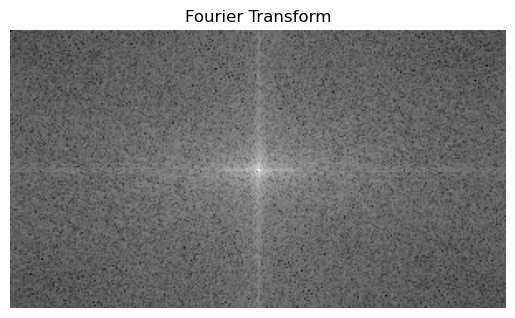

Image shape: (168, 300)
Butterworth filter shape: (168, 300)


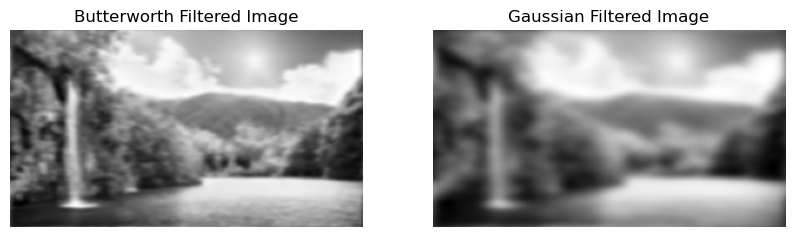

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('Nature.jpeg', cv2.IMREAD_GRAYSCALE)

# Get the shape of the image
shape = image.shape  # (rows, cols)

# Apply Fourier Transform and shift the zero frequency component to the center
f_transform = np.fft.fftshift(np.fft.fft2(image))

# Display the Fourier Transform
plt.figure()
plt.imshow(np.log(1 + np.abs(f_transform)), cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()

# Butterworth Low-Pass Filter function
def butterworth_filter(shape, cutoff, order):
    P, Q = shape  # Image dimensions
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(v, u)  # Note the order (v, u) to match shape
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

# Gaussian Low-Pass Filter function
def gaussian_filter(shape, sigma):
    P, Q = shape  # Image dimensions
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(v, u)  # Note the order (v, u) to match shape
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2) / (2 * sigma**2))
    return H

# Create Butterworth and Gaussian filters with matching shape
butter_filter = butterworth_filter(shape, cutoff=30, order=2)
gaussian_filter_result = gaussian_filter(shape, sigma=10)

# Ensure the shapes match
print("Image shape:", f_transform.shape)
print("Butterworth filter shape:", butter_filter.shape)

# Apply the filters to the Fourier-transformed image
butter_filtered = f_transform * butter_filter
gaussian_filtered = f_transform * gaussian_filter_result

# Inverse Fourier Transform to get the filtered images
butter_result = np.fft.ifft2(np.fft.ifftshift(butter_filtered))
gaussian_result = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered))

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(butter_result), cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(gaussian_result), cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.show()